# Data Preparation V1

In [6]:
#Library Imports

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


pd.set_option('display.max_rows',500)


print("Libraries Imported")

Libraries Imported


In [7]:
csvFilePath = r"C:\Users\joelg\Python_Codes_VC\Enterprise_Data_Science\Repo_Enter_Data_Science\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw = pd.read_csv(csvFilePath)

In [8]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [9]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/30/22', '5/31/22', '6/1/22', '6/2/22', '6/3/22', '6/4/22', '6/5/22',
       '6/6/22', '6/7/22', '6/8/22'],
      dtype='object', length=873)

In [10]:
time_idx = pd_raw.columns[4:]

In [11]:
# cutting out first 4 headings 
time_idx =  pd_raw.columns[4:]

In [12]:
df_plot = pd.DataFrame({
    'data':time_idx})
df_plot.head()

,data
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [13]:
# Cutting Counttries
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [14]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/4/22     26493235
6/5/22     26496611
6/6/22     26498361
6/7/22     26583016
6/8/22     26660652
Length: 869, dtype: int64

In [15]:
country_list = ['Italy', 'US', 'Spain', 'Germany', 'Korea, South']

In [16]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [17]:
df_plot

,data,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
...,...,...,...,...,...,...
864,6/4/22,17490451,84748884,12403245,26493235,18163686
865,6/5/22,17505973,84762022,12403245,26496611,18168708
866,6/6/22,17514589,84882287,12403245,26498361,18174880
867,6/7/22,17543136,85003945,12436538,26583016,18188200


In [18]:
df_plot

,data,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
...,...,...,...,...,...,...
864,6/4/22,17490451,84748884,12403245,26493235,18163686
865,6/5/22,17505973,84762022,12403245,26496611,18168708
866,6/6/22,17514589,84882287,12403245,26498361,18174880
867,6/7/22,17543136,85003945,12436538,26583016,18188200


<AxesSubplot:xlabel='data'>

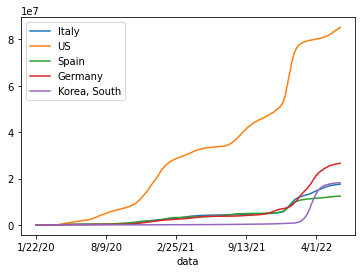

In [19]:
%matplotlib inline
df_plot.set_index('data').plot()

# Data Type Date

In [20]:
type(df_plot.data[0])

str

In [21]:
df_plot.head()
# date format is nto whtat we use

,data,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [22]:
df_plot.data[0]

'1/22/20'

In [23]:
import datetime
from datetime import datetime
datetime.strptime(df_plot.data[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [24]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.data] # convert to datetime
time_idx

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [25]:
time_str = [each.strftime('%Y-%m-%d') for each in time_idx] # convert back to ISO norm (str)
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [26]:
df_plot['date']= time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
df_plot.head()

,data,Italy,US,Spain,Germany,"Korea, South",date
0,1/22/20,0,1,0,0,1,2020-01-22
1,1/23/20,0,1,0,0,1,2020-01-23
2,1/24/20,0,2,0,0,2,2020-01-24
3,1/25/20,0,2,0,0,2,2020-01-25
4,1/26/20,0,5,0,0,3,2020-01-26


In [28]:
# store
df_plot.to_csv(r"C:\Users\joelg\Python_Codes_VC\Enterprise_Data_Science\Repo_Enter_Data_Science\data\processed\COVID_small_flat_table.csv",sep=';', index=False)

# Realtional Data MOdel - defining a primary key
trancational data and master daata

In [29]:
csvFilePath = r"C:\Users\joelg\Python_Codes_VC\Enterprise_Data_Science\Repo_Enter_Data_Science\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw = pd.read_csv(csvFilePath)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [30]:
pd_data_base = pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})

In [31]:
pd_data_base = pd_data_base.drop(['Lat','Long'], axis = 1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [32]:
pd_data_base.set_index(['state','country'])
test_pd = pd_data_base.set_index(['state','country']).T

In [33]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [34]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
247660,6/8/22,Western Australia,Australia,797041.0
247661,6/8/22,Xinjiang,China,1008.0
247662,6/8/22,Yukon,Canada,4404.0
247663,6/8/22,Yunnan,China,2157.0


In [35]:
test_pd.rename(columns={'level_0':'Date', 0:'Confirmed'})

state           NaN                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   
...             ...     ...     ...     ...    ...        ...   
6/4/22       180615  276342  265889   43067  99761         11   
6/5/22       180615  276401  265897   43067  99761         11   
6/6/22       180688  276415  265900   43067  99761         11   
6/7/22       180741  276468  265904   43067  99761         11   
6/8/22       180784  276518  265909   43224  99761         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
6/4/22                 8378   9230573  422963                       134286   
6/5/22                 8378   9276618  422963                       134286   
6/6/22                 8378   9276618  423006                       136860   
6/7/22                 8378   9276618  423006                       137664   
6/8/22                 8378   9276618  423006                       138407   

state    ...     NaN                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
6/4/22   ...  925777     239092    9445    523833  10724554   
6/5/22   ...  925777     239092    9445    523901  10725239   
6/6/22   ...  925777     239135   10061    523937  10726045   
6/7/22   ...  934961     239141   10239    523969  10727005   
6/8/22   ...  934961     239159   10338    523969  10727918   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
6/4/22              657705                  535  11822  322207   253236  
6/5/22              657705                  535  11822  322207   253338  
6/6/22              657705                  535  11822  322207   253508  
6/7/22              657879                  535  11822  322562   253637  
6/8/22              657879                  535  11822  322790   253779  

[869 rows x 285 columns]

In [36]:
pd_relational_model = pd_data_base.set_index(['state','country']) \
                             .T \
                                 .stack(level=[0,1]) \
                                    .reset_index()   \
                                        .rename(columns={'level_0':'Date', 0:'Confirmed'}) 
pd_relational_model.head()    

,Date,state,country,Confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [37]:
pd_relational_model.dtypes

Date          object
state         object
country       object
Confirmed    float64
dtype: object

In [38]:
# store
df_plot.to_csv(r"C:\Users\joelg\Python_Codes_VC\Enterprise_Data_Science\Repo_Enter_Data_Science\data\processed\COVID_relationaö_confirmed.csv",sep=';')

# Explorative Data Analzsis

In [49]:
df_plot = pd.read_csv(r"C:\Users\joelg\Python_Codes_VC\Enterprise_Data_Science\Repo_Enter_Data_Science\data\processed\COVID_small_flat_table.csv", sep=';')
# df_plot.drop({'Unnamed': '0'},axis=0)
df_plot.head()

,data,Italy,US,Spain,Germany,"Korea, South",date
0,1/22/20,0,1,0,0,1,2020-01-22
1,1/23/20,0,1,0,0,1,2020-01-23
2,1/24/20,0,2,0,0,2,2020-01-24
3,1/25/20,0,2,0,0,2,2020-01-25
4,1/26/20,0,5,0,0,3,2020-01-26


<AxesSubplot:xlabel='data'>

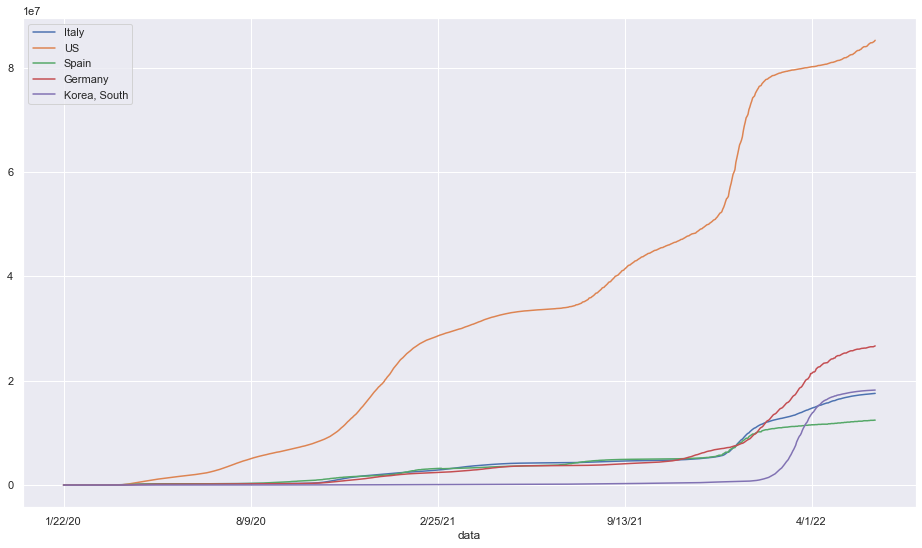

In [50]:
df_plot.set_index('data').plot()

In [51]:
sns.set(style="darkgrid")

In [52]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',500)

<Figure size 1152x648 with 0 Axes>

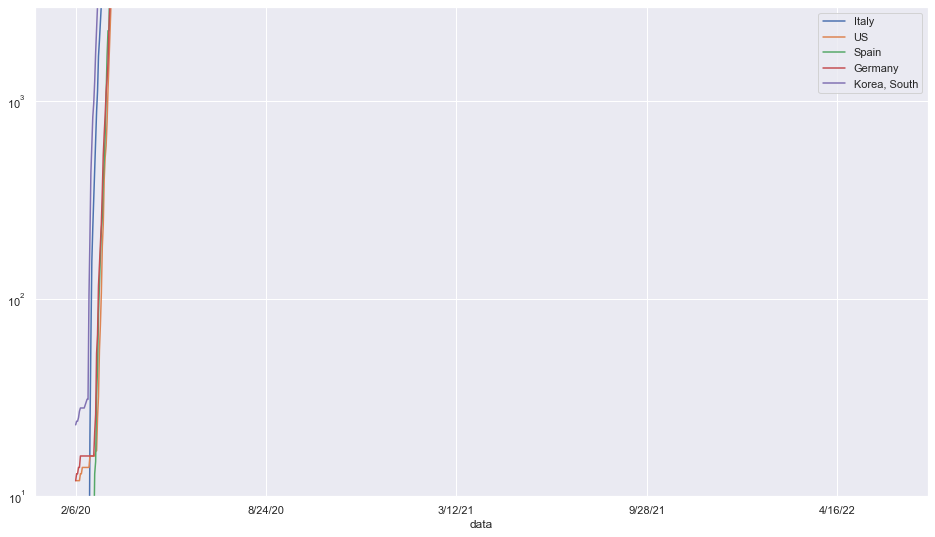

In [53]:
plt.figure();
ax = df_plot.iloc[15:,:].set_index('data').plot()
plt.ylim(10,3000)
ax.set_yscale('log')

# PLot.ly

In [54]:
import plotly.graph_objects as go


In [45]:
import plotly

In [55]:
fig = go.Figure()

In [72]:
# defines how to plot individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date, y=df_plot[each], mode = 'markers+lines', name =each, opacity=0.9, line_width=2, marker_size=4))

# defines the overall layout props
fig.update_layout( width=1000,height=600, xaxis_title="Time", yaxis_title="Confirmed infected people")
fig.update_yaxes(type="log", range=[1.1,5.5])

fig.update_layout(xaxis_rangeslider_visible=True)

# fig.show(renderer='chrome')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'name': 'Italy',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23', '2020-01-24', ..., '2022-06-06',
                          '2022-06-07', '2022-06-08'], dtype=object),
              'y': array([       1,        1,        2, ..., 84882287, 85003945, 85214036],
                         dtype=int64)},
             {'mode': 'markers+lines',
              'name': 'US',
              'type': 'scatter',
              'x': array(['2020-01-22', '2020-01-23

In [95]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout=html.Div([

    html.Label('Multi_Select COuntry'),
    dcc.Dropdown(
        id='country_drop_down',
    options=[
        {'label':'Italy','value':'Italy' },
        {'label':'US','value':'US' },
        {'label':'Spain','value':'Spain' },
        {'label':'Germany','value':'Germany' },
        {'label':'Korea, South','value':'Korea, South' },

    ],
    value=['US', 'Germany'], # which are pre-selected
    multi=True
    ),
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [96]:
from dash.dependencies import Input, Output
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')]
)
def update_figure(country_list):

    traces= []
    for each in country_list:
        traces.append(dict(x=df_plot.date, y=df_plot[each], mode = 'markers+lines', name =each, opacity=0.9, line_width=2, marker_size=4)
            
        )
    return{
       'data':traces,
       'layout':dict(width=1000,height=600, xaxis_title="Time", yaxis_title="Confirmed infected people") 
       # more layout changes
    }

In [97]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
